In [1]:
# cd to base directory of this repository to enable the loading of NEURON simulations
import os
os.chdir('/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim')
from neuron import h
from neurostim.cell import Cell
from neurostim.light_classes import LightSource, LightStimulation
from neurostim.utils import convert_polar_to_cartesian_xz, interpolate
from neurostim.polarmaps import get_AP_times, simple_polar_map
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import Greys_r as cmap
from matplotlib.cm import Reds as Reds
import matplotlib
from neurostim.light_propagation_models import foutz_et_al2012
import pickle
import pandas as pd

## light and neuron display
cortex_boundaries = { 
    'x': [0,1000],
    'y': [0,1000],
    'z': [-500,2000]
}
L1_x = 500

N1_x = 500
N1_y = 500
scaling_neurons = 1.4
neuron_color = 'tab:blue'

# NEURON setup
h.load_file("stdrun.hoc")
h.cvode_active(1)
# load cell and create stimulation object
chanrhod_expression = 13e9
chanrhod_distribution = 'uniform'
cortical_depth = {'L5':1170, 'L23':400}
    


In [2]:
# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=900

	1 
	1 
	1 
	1 
----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:617: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


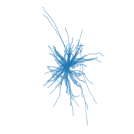

In [3]:
# top view on neuron
length = pw/3
width = pw/3
fig = plt.figure(constrained_layout=False, figsize=(width,length))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
ax1 = fig.add_subplot(gs[0,0])
L5 = Cell(
    hoc_file="simneurostim/model/hoc/L5.hoc",
    cortical_depth=cortical_depth,
    ChR_soma_density=float(chanrhod_expression),
    ChR_distribution=str(chanrhod_distribution),
    rm_mech_from_secs=None,
    delete_all_secs_except_soma=False
)
collection_top = L5.plot_foutz2012(
    func=lambda x:1, axes='xy',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x, shift_y=N1_y, alpha=0.5)
ax1.add_collection(collection_top)
# rectangle for scaling
#rectangle = plt.Rectangle((500,600), 50, 200,color='tab:gray',alpha=0.8, edgecolor=None)
#ax1.add_patch(rectangle)
ax1.set_xlim(*cortex_boundaries['x'])
ax1.set_ylim(*cortex_boundaries['y'])
# turn axes off for neuron and light 6isplay
ax1.set_axis_off()
ax1.set_aspect('equal')
fig.savefig('paper/NEW_FIGURES/FIG3/plots/L5_top.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()



	0 
	1 
	1 
	1 
	1 
	1 
	1 
----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


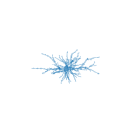

In [4]:
# top view on neuron
length = pw/3
width = pw/3
fig = plt.figure(constrained_layout=False, figsize=(width,length))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
ax1 = fig.add_subplot(gs[0,0])
L23 = Cell(
    hoc_file="simneurostim/model/hoc/L23.hoc",
    cortical_depth=cortical_depth,
    ChR_soma_density=float(chanrhod_expression),
    ChR_distribution=str(chanrhod_distribution),
    rm_mech_from_secs=None,
    delete_all_secs_except_soma=False
)
# scale down diameter because plotting scales diameter not correctly (line width scaling and it ends up as way to large)
h.soma.diam=1
collection_top = L23.plot_foutz2012(
    func=lambda x:1, axes='xy',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x, shift_y=N1_y, alpha=0.5)
ax1.add_collection(collection_top)
# rectangle for scaling
#rectangle = plt.Rectangle((500,600), 50, 200,color='tab:gray',alpha=0.8, edgecolor=None)
#ax1.add_patch(rectangle)
ax1.set_xlim(*cortex_boundaries['x'])
ax1.set_ylim(*cortex_boundaries['y'])
# turn axes off for neuron and light 6isplay
ax1.set_axis_off()
ax1.set_aspect('equal')
fig.savefig('paper/NEW_FIGURES/FIG3/plots/L23_top.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()